In [30]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("delivery_time.csv")
data.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [40]:
# Correlation
data.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

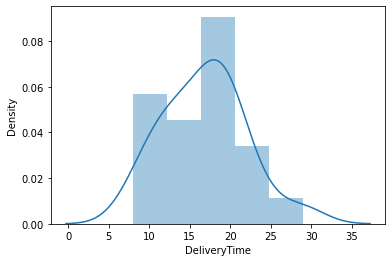

In [32]:
import seaborn as sns
sns.distplot(data['DeliveryTime'])

<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

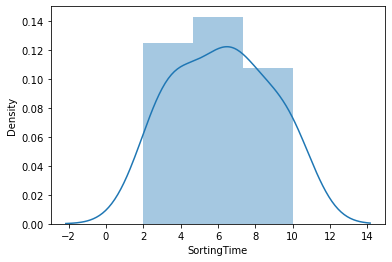

In [33]:
sns.distplot(data['SortingTime'])

## Fitting a Linear Regression Model

In [34]:
import statsmodels.formula.api as smf
model = smf.ols("DeliveryTime~SortingTime",data = data).fit()

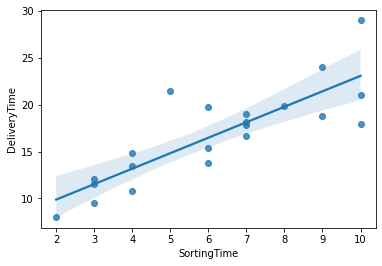

In [35]:
sns.regplot(x="SortingTime", y="DeliveryTime", data=data);

In [36]:
#Coefficients
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [37]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues) 

Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [39]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Predict for new data point

In [45]:
#Predict for 21.00, 13.50 and 29.00 Sorting Time
deliverydata=pd.Series([21.00,13.50,29.00])

In [46]:
data_pred=pd.DataFrame(deliverydata,columns=['SortingTime'])

In [47]:
model.predict(data_pred)

0    41.212152
1    28.844503
2    54.404311
dtype: float64